### Cenário 1

A análise desse script é embasado no dataset `EstudoSemValoresMissing.csv`. O dataset esta com todos os valores missing removidos. Com isso, nenhuma tratativa aos valores missing foram realizadas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
# Versões dos pacotes usadas neste Jupyter Notebook
!python --version
%reload_ext watermark
%watermark -a "Mentoria DSA" --iversions

Python 3.7.3
Author: Mentoria DSA

matplotlib: 3.0.3
pandas    : 0.24.2
numpy     : 1.16.2
seaborn   : 0.9.0



In [3]:
# Carregamento do dataset
df = pd.read_csv("../../data/EstudoSemValoresMissing.csv")

In [4]:
# Mostra do dataset
df.head()

,created_on,property_type,place_name,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,Estado,Cidade,Bairro
0,2013-09-04,apartment,Higienópolis,2000000.0,2019190.68,631273.27,180.0,3507.073722,11111.111111,3,São Paulo,São Paulo,Higienópolis
1,2013-09-04,apartment,Higienópolis,960000.0,969211.52,303011.17,109.0,2779.918991,8807.339450,3,São Paulo,São Paulo,Higienópolis
2,2013-09-04,apartment,Higienópolis,1300000.0,1312473.95,410327.63,130.0,3156.366385,10000.000000,3,São Paulo,São Paulo,Higienópolis
3,2013-09-04,apartment,Perdizes,1050000.0,1060075.11,331418.47,145.0,2285.644621,7241.379310,3,São Paulo,São Paulo,Perdizes
4,2013-09-04,house,Perdizes,1200000.0,1211514.40,378763.96,218.0,1737.449358,5504.587156,2,São Paulo,São Paulo,Perdizes


In [5]:
# verificação dos tipos de variáveis
df.dtypes

created_on                     object
property_type                  object
place_name                     object
price                         float64
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
rooms                           int64
Estado                         object
Cidade                         object
Bairro                         object
dtype: object

In [6]:
# Transformando o formato da coluna "create_on" em datatime
df['created_on'] = pd.to_datetime(df['created_on'])

In [7]:
# Dimensão do dataframe
df.shape

(266984, 13)

Text(0.5, 1.0, 'Quantidade de Registro por Estado')

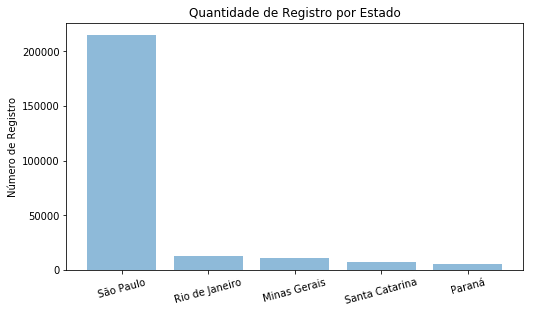

In [8]:
# Cinco maiores estados presentes no dataframe
value_state = df['Estado'].value_counts().head(5).tolist()
name_states = df['Estado'].value_counts().head(5).index.tolist()
w_pos = np.arange(len(name_states))
plt.figure(figsize=(18,10))
plt.subplot(222)
plt.bar(w_pos, value_state, align='center', alpha=0.5)
plt.xticks(w_pos, name_states, rotation=15)
plt.ylabel('Número de Registro')
plt.title('Quantidade de Registro por Estado')

O gráfico representa o maior número de estados presentes no dataset. Conforme observado, o estado de São Paulo representa 80% dos dados registrados, nesse dataset. Com isso, o modelo tende a aprender mais com os registros de São Paulo do que com as outras regiões.<br>
Somente com o gráfico acima pode-se concluir que, dentro desse cenário, compensa elaborar um modelo de regressão linear apenas para o estado de São Paulo.

Text(0.5, 1.0, 'Média dos Valores por Cidade de SP (em Milhões)')

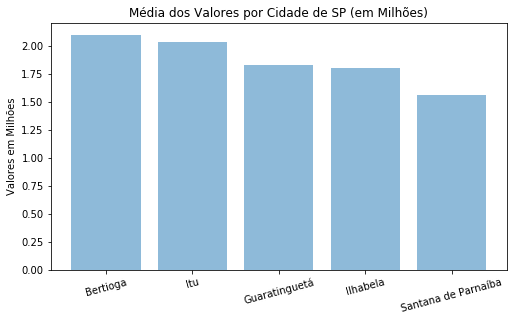

In [9]:
# Top 5 Cidades mais caros de São Paulo (na média), segundo o Dataset
valores = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
nomes = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
w_pos1 = np.arange(len(nomes))
plt.figure(figsize=(18,10))
plt.subplot(222)
plt.bar(w_pos1, valores, align='center', alpha=0.5)
plt.xticks(w_pos1,nomes, rotation=15)
plt.ylabel("Valores em Milhões")
plt.title("Média dos Valores por Cidade de SP (em Milhões)")

Text(0.5, 1.0, 'Mediana dos Valores por Cidade de SP (em Milhões)')

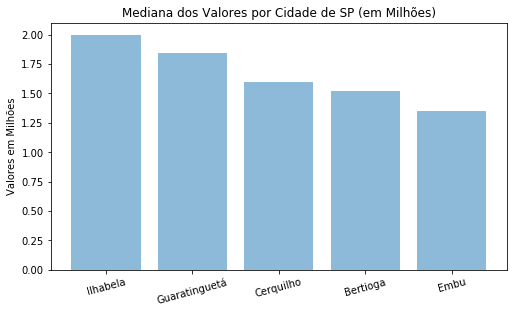

In [10]:
# Top 5 Cidades mais caros de São Paulo (na média), segundo o Dataset
valores = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].median()/1000000).sort_values(ascending=False).head(5).tolist()
nomes = (df[df['Estado'] == "São Paulo"].groupby('Cidade')['price'].median()/1000000).sort_values(ascending=False).head(5).index.tolist()
w_pos1 = np.arange(len(nomes))
plt.figure(figsize=(18,10))
plt.subplot(222)
plt.bar(w_pos1, valores, align='center', alpha=0.5)
plt.xticks(w_pos1,nomes, rotation=15)
plt.ylabel("Valores em Milhões")
plt.title("Mediana dos Valores por Cidade de SP (em Milhões)")

Os valores das médias e medianas de preços do imóveis, das cidades do gráficos acima, são considerando todos os tipos de imóveis. Ou seja, apartment, house, PH e store.

Text(0.5, 1.0, 'Média dos Valores por Estado (em Milhões)')

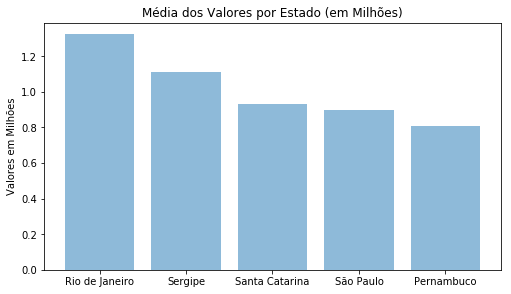

In [11]:
# Preço médio dos imóveis por estado
valores_estado = (df.groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
nomes_estados = (df.groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
w_pos1 = np.arange(len(nomes_estados))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(w_pos1, valores_estado, align='center', alpha=0.5)
plt.xticks(w_pos1,nomes_estados, rotation=0)
plt.ylabel("Valores em Milhões")
plt.title("Média dos Valores por Estado (em Milhões)")

Apesar do estado de São Paulo representar 80% dos registros, presente nesse dataframe, o estado do Rio de Janeiro apresenta a maior média dos imóveis, por estado. São Paulo corresponde como quarto estado com maior média entre os estados brasileiros.<br>
O gráfico acima não difere os tipos de imóveis, como apartamento ou casa. Essa informação é extraída nos gráficos seguintes.

In [12]:
# Definindo a média dos preços por tipo de imóvel
print("\tMédias em Milhões\n")
for i in df[df.columns[1]].unique().tolist():
    a = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5)
    print("Médias da variável", i)
    print(a)
    print('\n')

	Médias em Milhões

Médias da variável apartment
Estado
Rio de Janeiro    1.293047
Sergipe           1.110000
Santa Catarina    0.973757
São Paulo         0.889845
Pernambuco        0.749440
Name: price, dtype: float64


Médias da variável house
Estado
Rio de Janeiro      1.463039
Pernambuco          1.415649
Minas Gerais        1.319322
Bahia               1.207552
Distrito Federal    0.998598
Name: price, dtype: float64


Médias da variável PH
Estado
Distrito Federal     1.377500
São Paulo            0.688216
Paraná               0.683300
Santa Catarina       0.477280
Rio Grande do Sul    0.371250
Name: price, dtype: float64


Médias da variável store
Estado
Pernambuco        1.231000
Santa Catarina    0.784804
São Paulo         0.743250
Paraná            0.658169
Minas Gerais      0.590662
Name: price, dtype: float64




<Figure size 1440x1080 with 0 Axes>

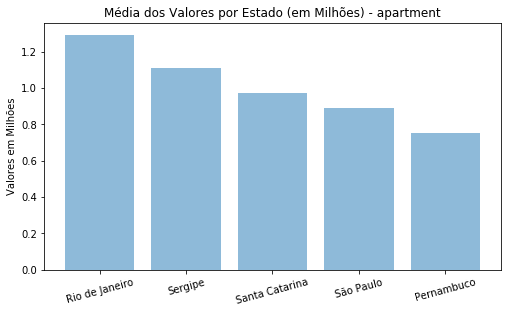

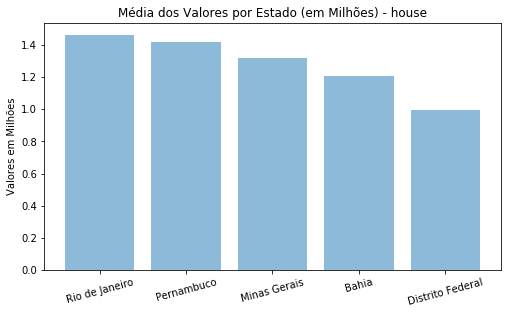

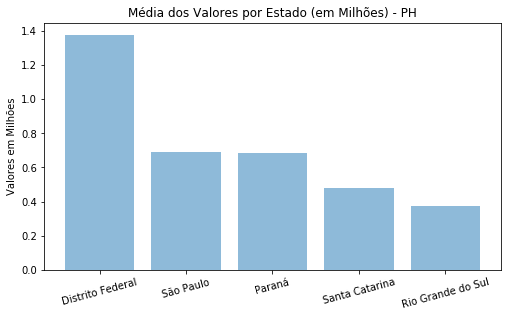

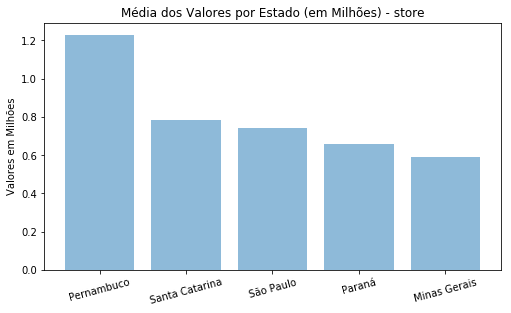

In [13]:
# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(20,15))

# Definição da posição dos gráficos
subplot = 221

for i in df[df.columns[1]].unique().tolist():
        
    valores_estado = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes_estados = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes_estados))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores_estado, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes_estados, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Estado (em Milhões) - %s" % i)
    subplot = subplot + 1

Os gráficos acima mostram que o estado do Rio de Janeiro, na média, possui as casas e apartamentos mais caros. No entanto, nos tipos de imóveis store e PH, o estado do Rio de Janeiro não está presente na média dos estados mais caros.<br>
Abaixo verifica-se as a média dos preços de cada tipo de imóvel por cidade:

<Figure size 1440x1080 with 0 Axes>

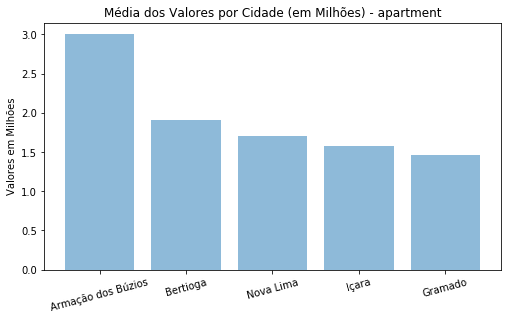

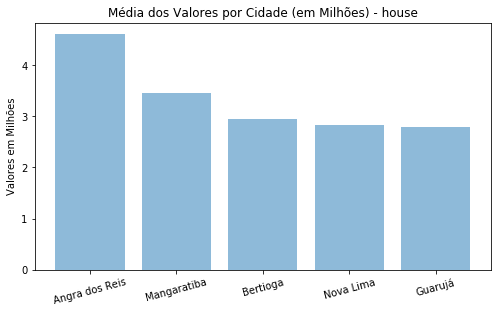

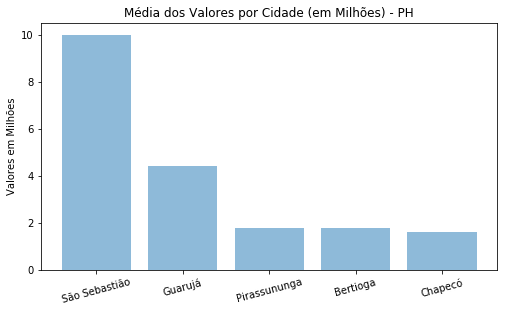

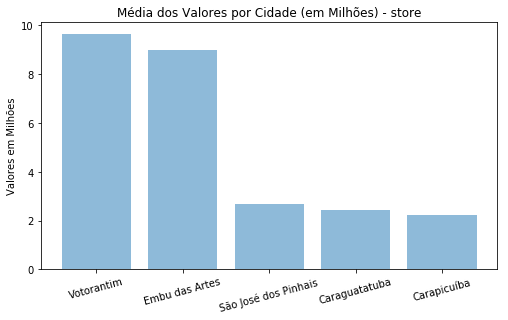

In [14]:
# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(20,15))

# Definição da posição dos gráficos
subplot = 221

for i in df[df.columns[1]].unique().tolist():
        
    valores = (df[df['property_type'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes = (df[df['property_type'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Cidade (em Milhões) - %s" % i)
    subplot = subplot + 1

Considerando a média dos preços dos imóveis por estado, encontra-se abaixo o valor médio de cada tipo de imóvel por cidade (os estados utilizados são os que possuem maior média de preços):

In [15]:
# Preço dos tipos de imóveis por cidades, nos estados com maior média de preço
for i in df[df.columns[1]].unique().tolist():
    print("Tipo de imóvel: ", i)
    states = (df[df['property_type'] == i].groupby('Estado')['price'].mean()/1000000)\
            .sort_values(ascending=False).head(5).index.tolist()
    for cities in states:
        print("Estado: ", cities)
        city = (df[df['Estado'] == cities].groupby('Cidade')['price'].mean()/1000000)\
            .sort_values(ascending=False).head(5).index.tolist()
        print(city)
    print("\n")

Tipo de imóvel:  apartment
Estado:  Rio de Janeiro
['Angra dos Reis', 'Mangaratiba', 'Armação dos Búzios', 'Rio de Janeiro', 'Petrópolis']
Estado:  Sergipe
['Aracaju']
Estado:  Santa Catarina
['Balneário Camboriú', 'Bombinhas', 'Blumenau', 'Itapema', 'São Francisco do Sul']
Estado:  São Paulo
['Bertioga', 'Itu', 'Guaratinguetá', 'Ilhabela', 'Santana de Parnaíba']
Estado:  Pernambuco
['Ipojuca', 'Recife', 'Camaragibe', 'Jaboatão dos Guararapes', 'Olinda']


Tipo de imóvel:  house
Estado:  Rio de Janeiro
['Angra dos Reis', 'Mangaratiba', 'Armação dos Búzios', 'Rio de Janeiro', 'Petrópolis']
Estado:  Pernambuco
['Ipojuca', 'Recife', 'Camaragibe', 'Jaboatão dos Guararapes', 'Olinda']
Estado:  Minas Gerais
['Nova Lima', 'Rio Acima', 'Pouso Alegre', 'Belo Horizonte', 'Lagoa Santa']
Estado:  Bahia
['Porto Seguro', 'Camaçari', 'Itacaré', 'Mata de São João', 'Santa Cruz Cabrália']
Estado:  Distrito Federal
['Brasília', 'Ceilândia']


Tipo de imóvel:  PH
Estado:  Distrito Federal
['Brasília', 'C

<Figure size 2160x1800 with 0 Axes>

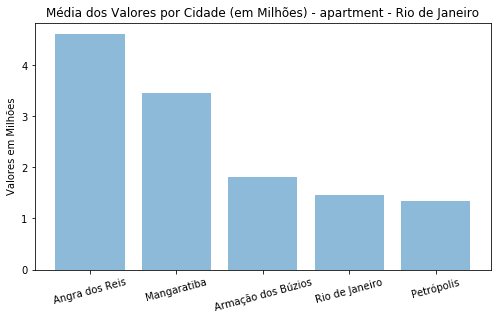

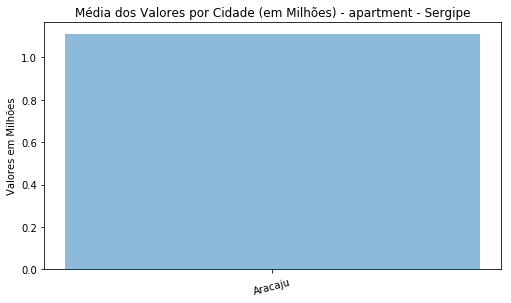

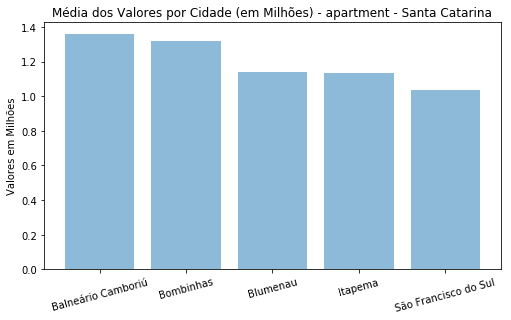

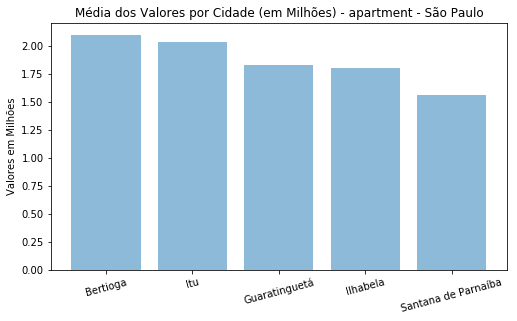

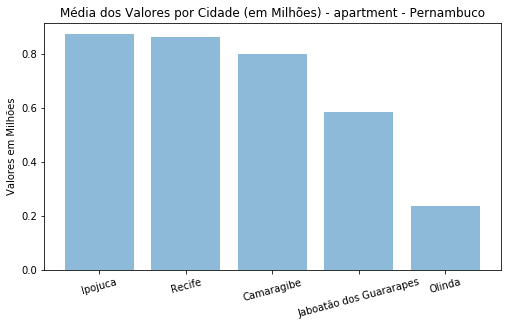

In [16]:
### TIPO: APARTMENT #####


df[df['property_type'] == 'apartment']
topStates = (df[df['property_type'] == 'apartment'].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()

# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(30,25))

# Definição da posição dos gráficos
subplot = 221

for i in topStates:
        
    valores = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Cidade (em Milhões) - apartment - %s" % i)
#     subplot = subplot + 1

<Figure size 2160x1800 with 0 Axes>

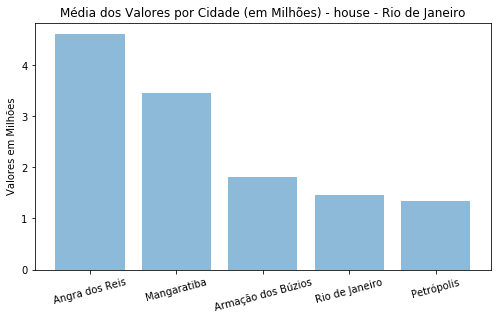

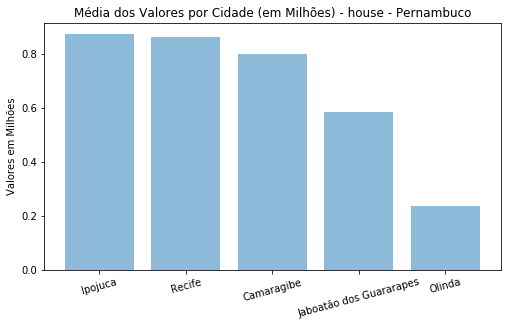

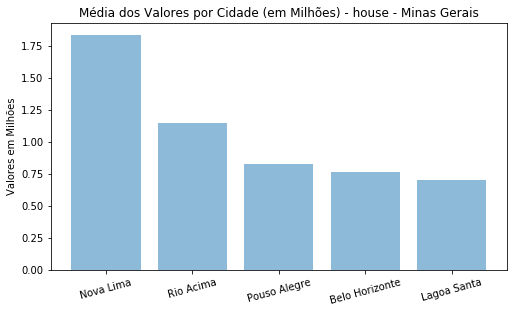

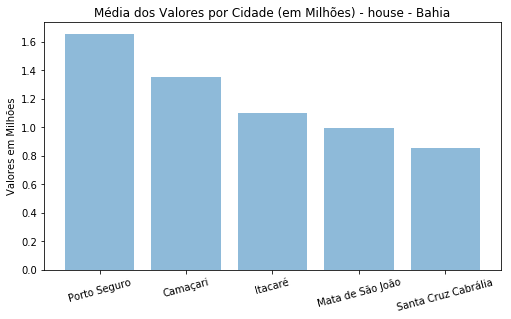

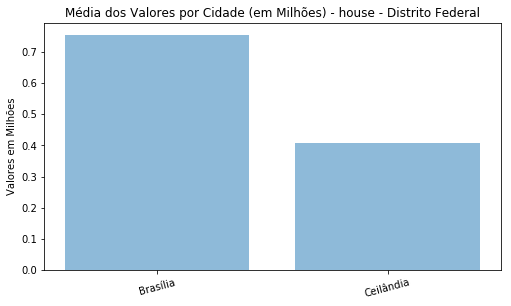

In [17]:
### TIPO: HOUSE #####


df[df['property_type'] == 'house']
topStates = (df[df['property_type'] == 'house'].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()

# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(30,25))

# Definição da posição dos gráficos
subplot = 221

for i in topStates:
        
    valores = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Cidade (em Milhões) - house - %s" % i)
#     subplot = subplot + 1

<Figure size 2160x1800 with 0 Axes>

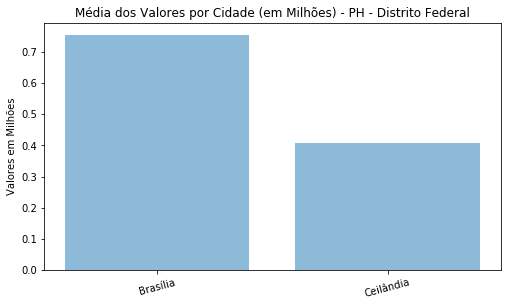

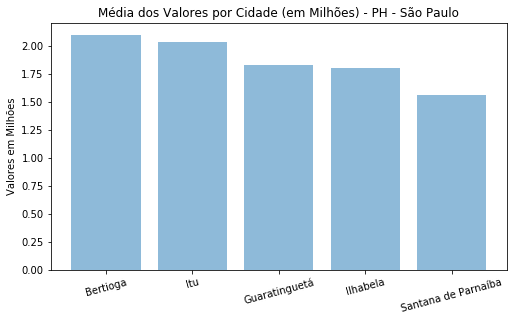

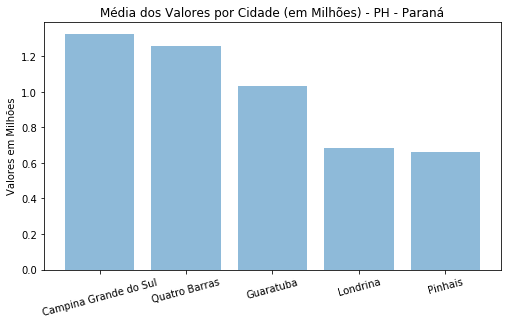

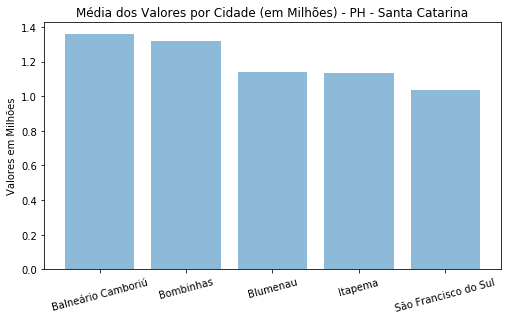

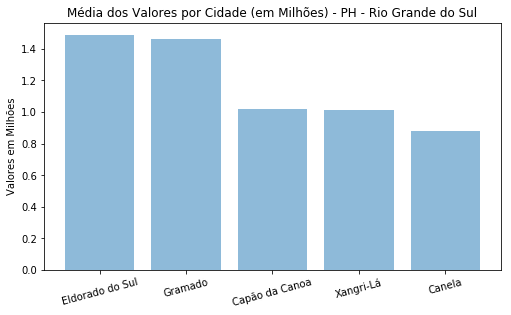

In [18]:
### TIPO: PH #####


df[df['property_type'] == 'PH']
topStates = (df[df['property_type'] == 'PH'].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()

# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(30,25))

# Definição da posição dos gráficos
subplot = 221

for i in topStates:
        
    valores = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Cidade (em Milhões) - PH - %s" % i)
#     subplot = subplot + 1

<Figure size 2160x1800 with 0 Axes>

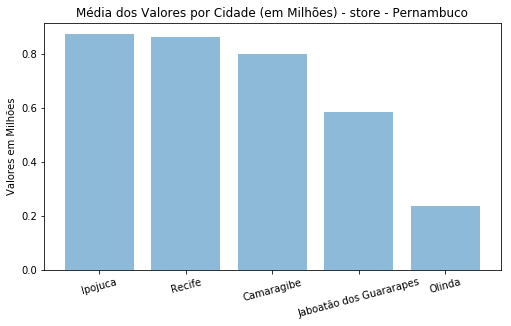

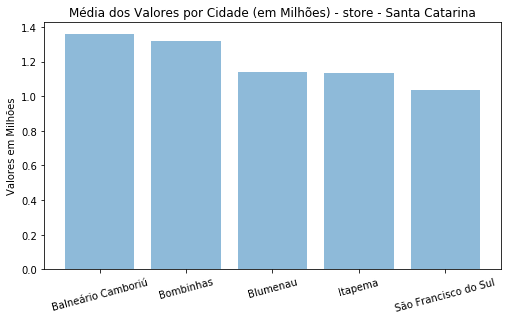

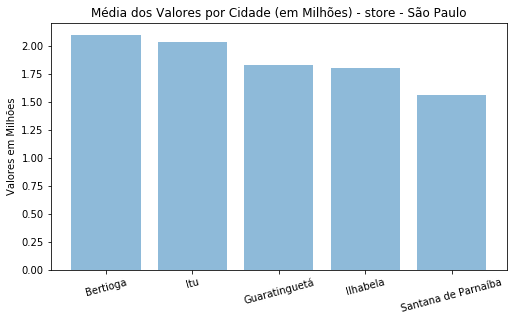

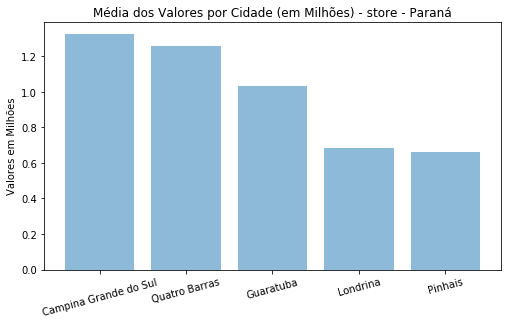

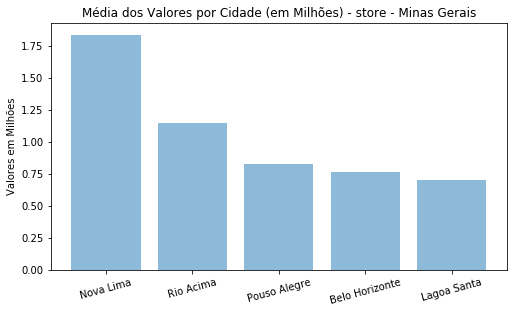

In [19]:
### TIPO: STORE #####


df[df['property_type'] == 'store']
topStates = (df[df['property_type'] == 'store'].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()

# Colocando as informações acima em gráficos

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(30,25))

# Definição da posição dos gráficos
subplot = 221

for i in topStates:
        
    valores = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).tolist()
    nomes = (df[df['Estado'] == i].groupby('Cidade')['price'].mean()/1000000).sort_values(ascending=False).head(5).index.tolist()
    w_pos1 = np.arange(len(nomes))
    plt.figure(figsize=(18,10))
    plt.subplot(subplot)
    plt.bar(w_pos1, valores, align='center', alpha=0.5)
    plt.xticks(w_pos1,nomes, rotation=15)
    plt.ylabel("Valores em Milhões")
    plt.title("Média dos Valores por Cidade (em Milhões) - store - %s" % i)
#     subplot = subplot + 1

### Análises dos imóveis por anos

In [20]:
# Para comparar a média dos valores anuais de cada estado,
# necessita criar uma coluna do ano
df['Ano'] = df['created_on'].map(lambda x: x.strftime("%Y"))

In [21]:
df.head()

,created_on,property_type,place_name,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,Estado,Cidade,Bairro,Ano
0,2013-09-04,apartment,Higienópolis,2000000.0,2019190.68,631273.27,180.0,3507.073722,11111.111111,3,São Paulo,São Paulo,Higienópolis,2013
1,2013-09-04,apartment,Higienópolis,960000.0,969211.52,303011.17,109.0,2779.918991,8807.339450,3,São Paulo,São Paulo,Higienópolis,2013
2,2013-09-04,apartment,Higienópolis,1300000.0,1312473.95,410327.63,130.0,3156.366385,10000.000000,3,São Paulo,São Paulo,Higienópolis,2013
3,2013-09-04,apartment,Perdizes,1050000.0,1060075.11,331418.47,145.0,2285.644621,7241.379310,3,São Paulo,São Paulo,Perdizes,2013
4,2013-09-04,house,Perdizes,1200000.0,1211514.40,378763.96,218.0,1737.449358,5504.587156,2,São Paulo,São Paulo,Perdizes,2013


In [22]:
df.dtypes

created_on                    datetime64[ns]
property_type                         object
place_name                            object
price                                float64
price_aprox_local_currency           float64
price_aprox_usd                      float64
surface_covered_in_m2                float64
price_usd_per_m2                     float64
price_per_m2                         float64
rooms                                  int64
Estado                                object
Cidade                                object
Bairro                                object
Ano                                   object
dtype: object

In [23]:
# Definindo a média anual dos preços por tipo de imóvel

df[df['property_type'] == 'apartment']

print("\tMédias em Milhões\n")
for i in df[df.columns[13]].unique().tolist():
    a = (df[df['Ano'] == i].groupby('Estado')['price'].mean()/1000000).sort_values(ascending=False)
    print("Médias da variável - apartment", i)
    print(a)
    print('\n')

	Médias em Milhões

Médias da variável - apartment 2013
Estado
Rio de Janeiro    1.584812
São Paulo         1.045093
Paraíba           0.512050
Name: price, dtype: float64


Médias da variável - apartment 2014
Estado
Pernambuco          2.247500
Rio de Janeiro      1.379232
Santa Catarina      1.144889
São Paulo           0.911887
Distrito Federal    0.476665
Minas Gerais        0.360733
Paraíba             0.316080
Name: price, dtype: float64


Médias da variável - apartment 2015
Estado
Sergipe                1.680000
Rio de Janeiro         1.435723
Santa Catarina         1.064277
São Paulo              0.919081
Distrito Federal       0.907636
Ceará                  0.825661
Minas Gerais           0.811306
Pernambuco             0.771383
Bahia                  0.749396
Paraná                 0.674465
Pará                   0.642951
Goiás                  0.639365
Rio Grande do Sul      0.634665
Mato Grosso            0.597865
Espírito Santo         0.517429
Rio Grande do Norte    0.49

Com o cálculo da média anual, de apenas um tipo de imóvel (Apartment), percebe-se que não há presença de todas unidades federativas nos anos de 2013 e 2014. Essa deficiência de dados, presente nos anos 2013 e 2014, pode ter sido consequência da alta remoção de registros para criação deste dataset. Os únicos estados que aparecem em todos os anos, do dataset, são São Paulo, Rio de Janeiro e Paraíba.

In [24]:
# Para plotar um gráfico de linhas dos únicos estados que aparecem em todos os anos, do dataset,
# é necessário pegar a média anual de cada estado.

# ['apartment', 'house', 'PH', 'store']
# ['São Paulo', 'Rio de Janeiro', 'Paraíba']

def mediaanual(p_type, estado):
    
    property_type = df[df.columns[1]].unique().tolist()
    state = df[df.columns[10]].unique().tolist()
    
    df_filter = df[(df['property_type'] == property_type[p_type]) & (df['Estado'] == state[estado])]
    
    lista = []
    
    for i in df_filter[df_filter.columns[13]].unique().tolist():
        a = (df_filter[df_filter['Ano'] == i]['price'].mean()/1000000)
        lista.append(a)
    return(lista)

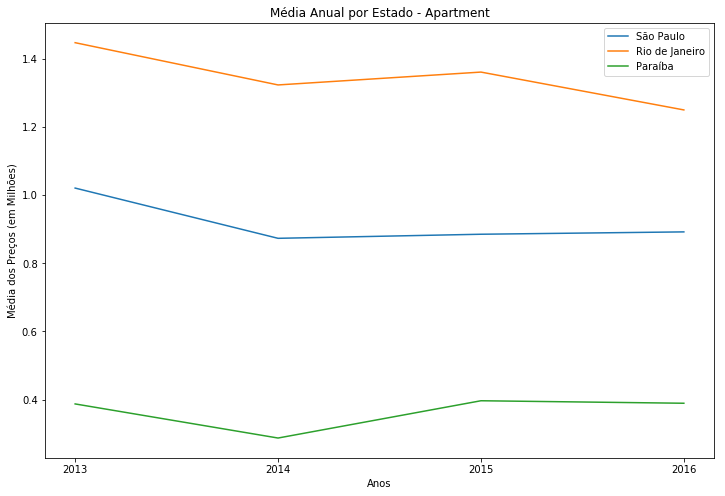

In [25]:
# ['apartment', 'house', 'PH', 'store']
# ['São Paulo', 'Rio de Janeiro', 'Paraíba']

# Anos do dataset
year = df[df.columns[13]].unique().tolist()

# Media anual de cada estado
sp = mediaanual(0,0)
rj = mediaanual(0,1)
pb = mediaanual(0,2)

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(12,8))

# Plot gráfico
plt.plot(year, sp, label = "São Paulo")
plt.plot(year, rj, label = "Rio de Janeiro")
plt.plot(year, pb, label = "Paraíba")

plt.xlabel('Anos')
plt.ylabel('Média dos Preços (em Milhões)')
plt.title('Média Anual por Estado - Apartment')

plt.legend()
plt.show()

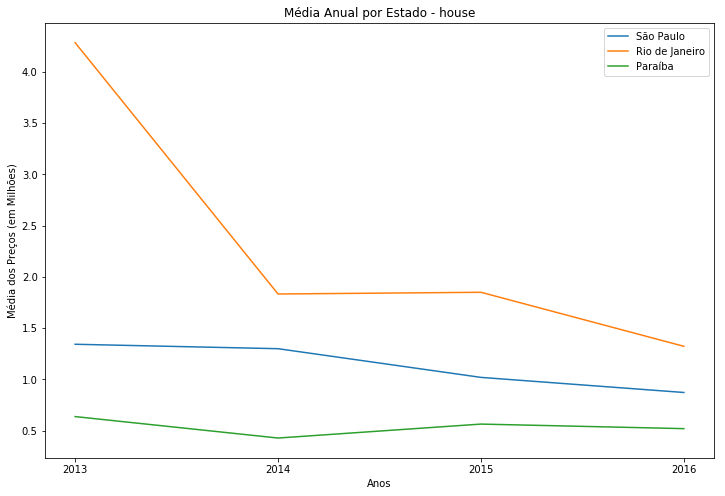

In [26]:
# ['apartment', 'house', 'PH', 'store']
# ['São Paulo', 'Rio de Janeiro', 'Paraíba']

# Anos do dataset
year = df[df.columns[13]].unique().tolist()

# Media anual de cada estado
sp = mediaanual(1,0)
rj = mediaanual(1,1)
pb = mediaanual(1,2)

# Definindo o tamanho da área dos gráficos
plt.figure(figsize=(12,8))

# Plot gráfico
plt.plot(year, sp, label = "São Paulo")
plt.plot(year, rj, label = "Rio de Janeiro")
plt.plot(year, pb, label = "Paraíba")
plt.xlabel('Anos')
plt.ylabel('Média dos Preços (em Milhões)')
plt.title('Média Anual por Estado - house')
plt.legend()
plt.show()

Com o cálculo das médias anuais dos preços dos imóveis, por estado, percebe-se a grande diferença entre os valores por estado. Um exemplo que exemplifica essa suposição encontra-se no gráfico da `Média Anual por Estado`, para casas. No Rio de Janeiro, no ano de 2013, a média dos valores das casas ultrapassa <font color="red">quatro milhões</font>, frente a média de <font color="red">1.5 milhão</font> do Estado de São Paulo e uma média de <font color="red">meio milhão</font> para o estado da Paraíba. Devido ao alto intervalo entre as médias, abre a hipótese para justificar o desbalanceamento do valores do Histograma.

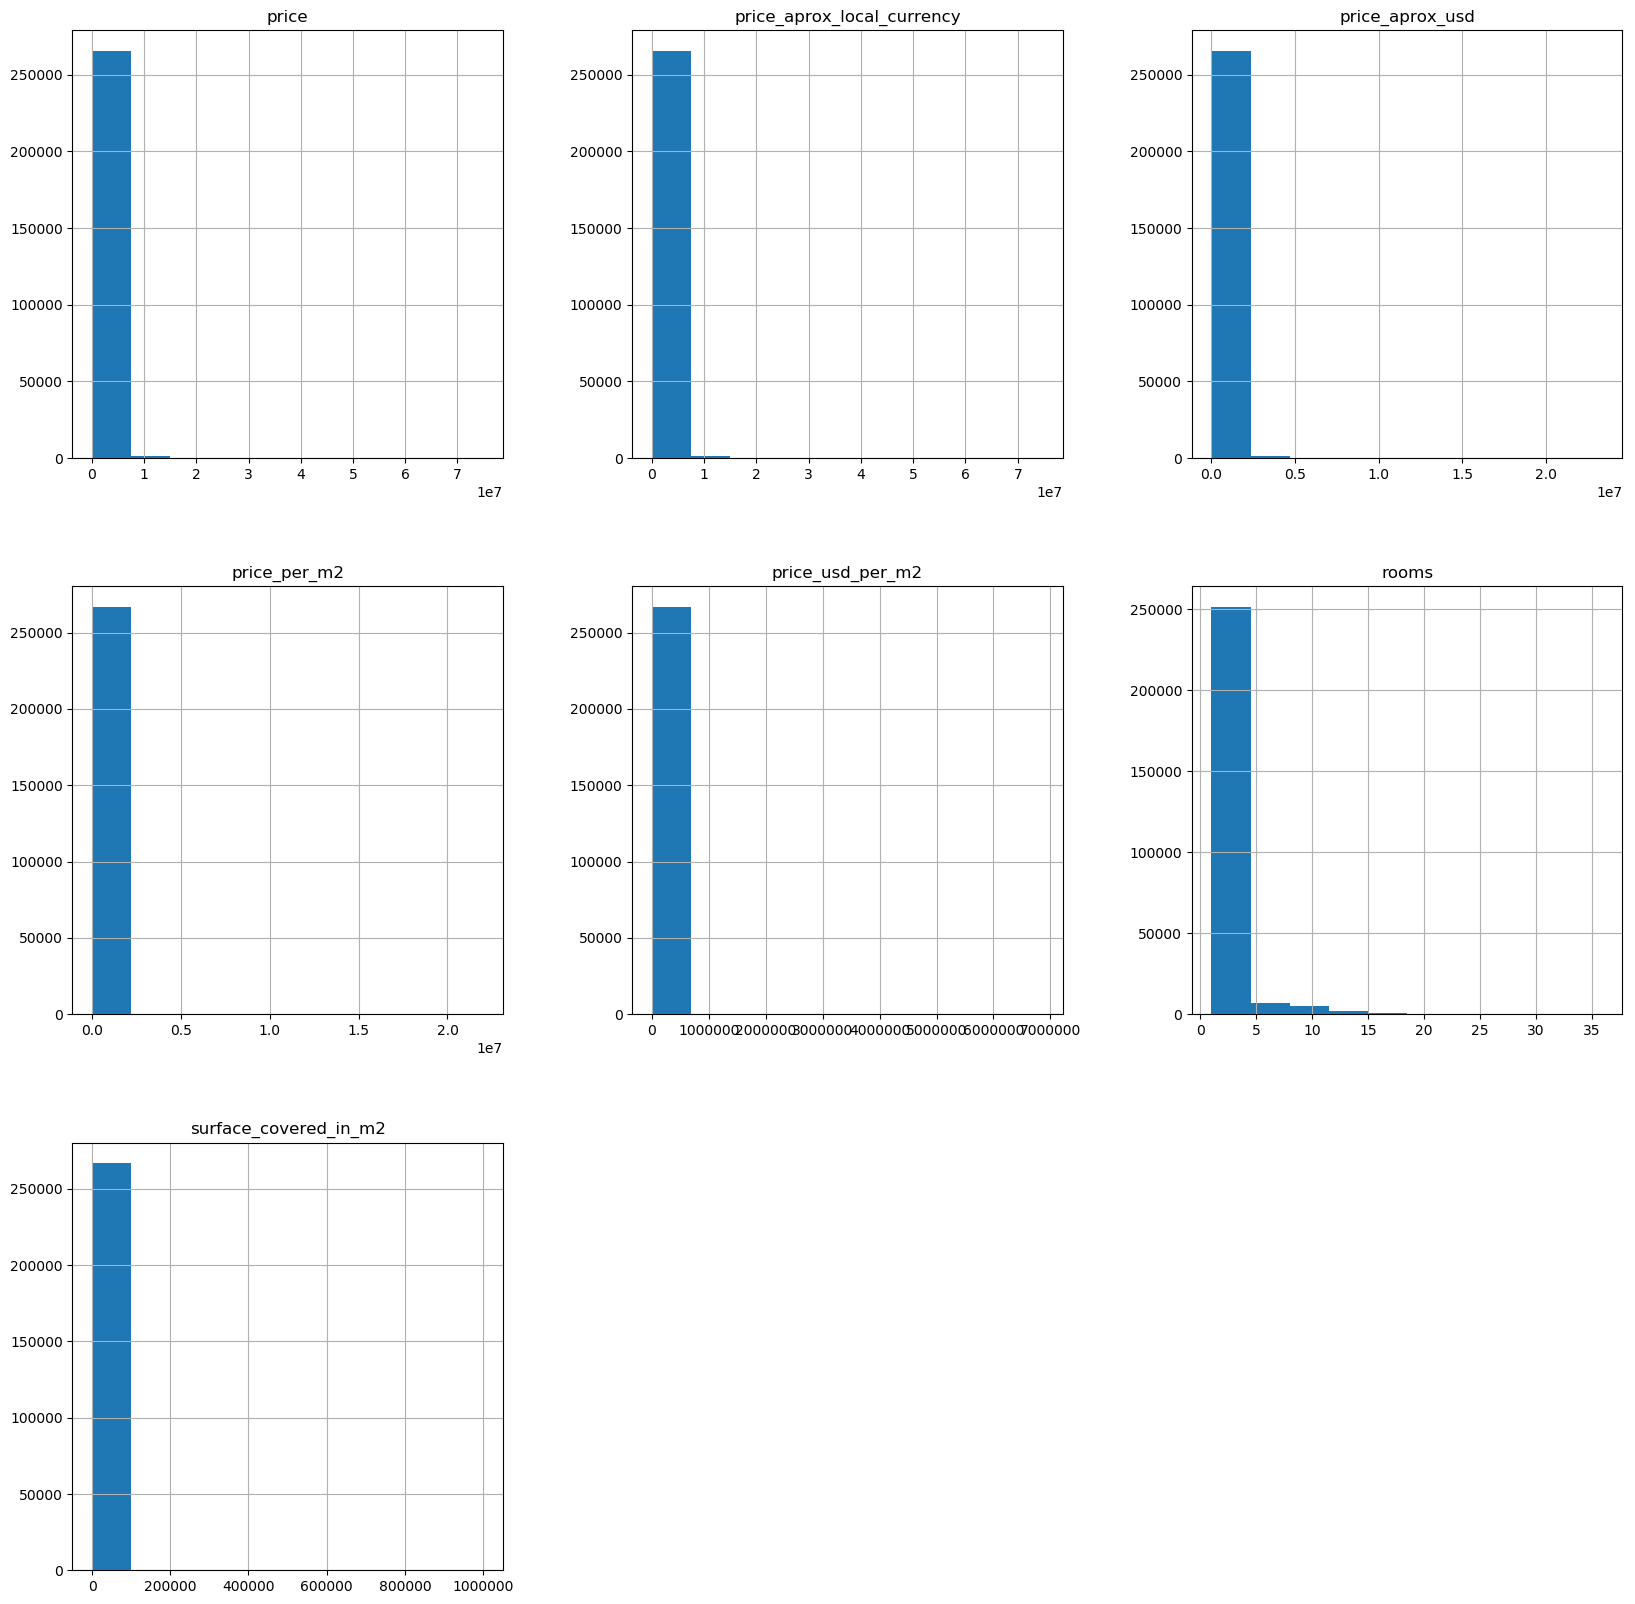

In [27]:
#análise do histograma
plt.style.use("default")
df.hist(layout=(3,3), figsize= (20,20))
plt.show()

In [28]:
# variáveis contínuas
continuous = ['price_aprox_local_currency',
              'price_aprox_usd',
              'surface_covered_in_m2',
              'price_usd_per_m2',
              'price_per_m2',
              'rooms']

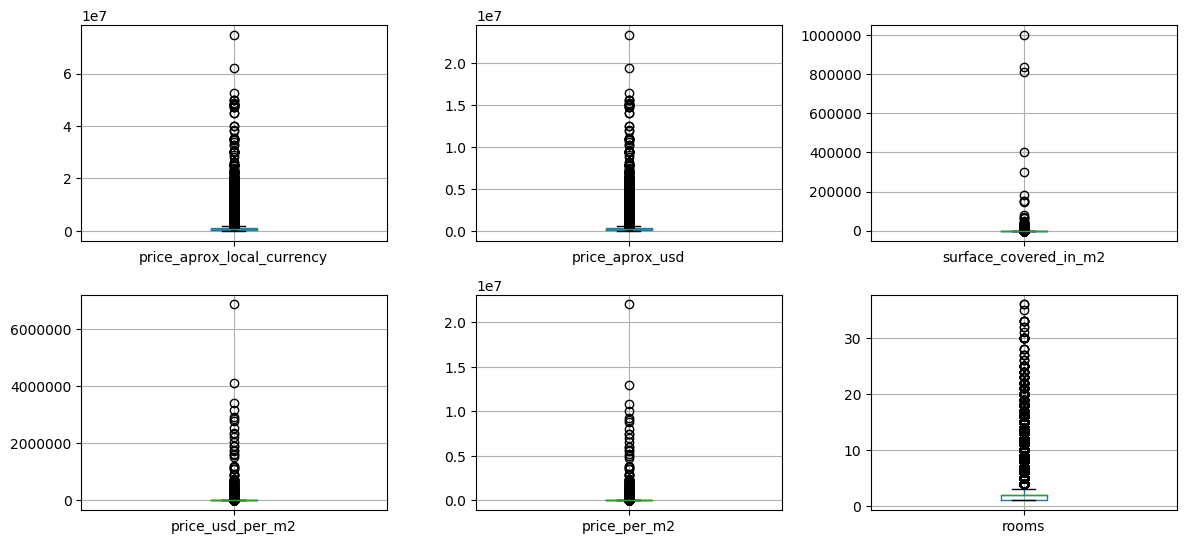

In [29]:
# Boxplot das variáveis

# tamanho da área de plotagem

fig = plt.figure(figsize=(12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i+1);
    df.boxplot(col);
    plt.tight_layout()

A distribuição dos dados, segundo o histograma e boxplot acima, aponta que os valores das variáveis contínuas não apresentam uma distribuição uniforme. Como possível ajuste, será aplicado uma função logarítmica no dataset. 

In [30]:
# criação de uma cópia para aplicação logarítmica no dataset
df_copy = df.copy()

In [31]:
# Transformação de log nas variáveis contínuas
df_copy[continuous] = np.log1p(1 + df_copy[continuous])

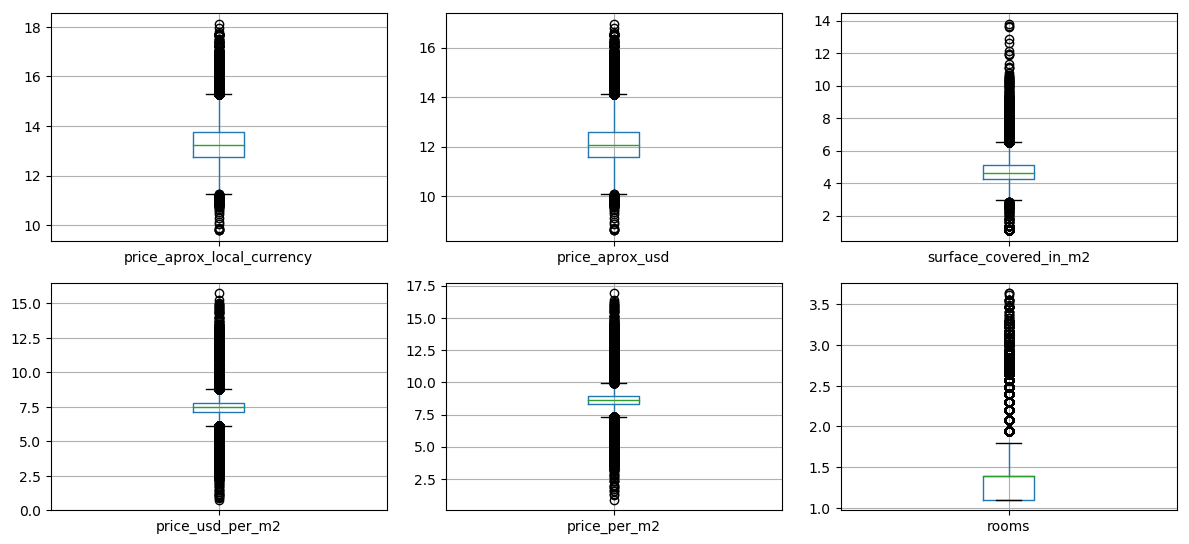

In [32]:
# Boxplot das variáveis

# tamanho da área de plotagem

fig = plt.figure(figsize=(12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i+1);
    df_copy.boxplot(col);
    plt.tight_layout()

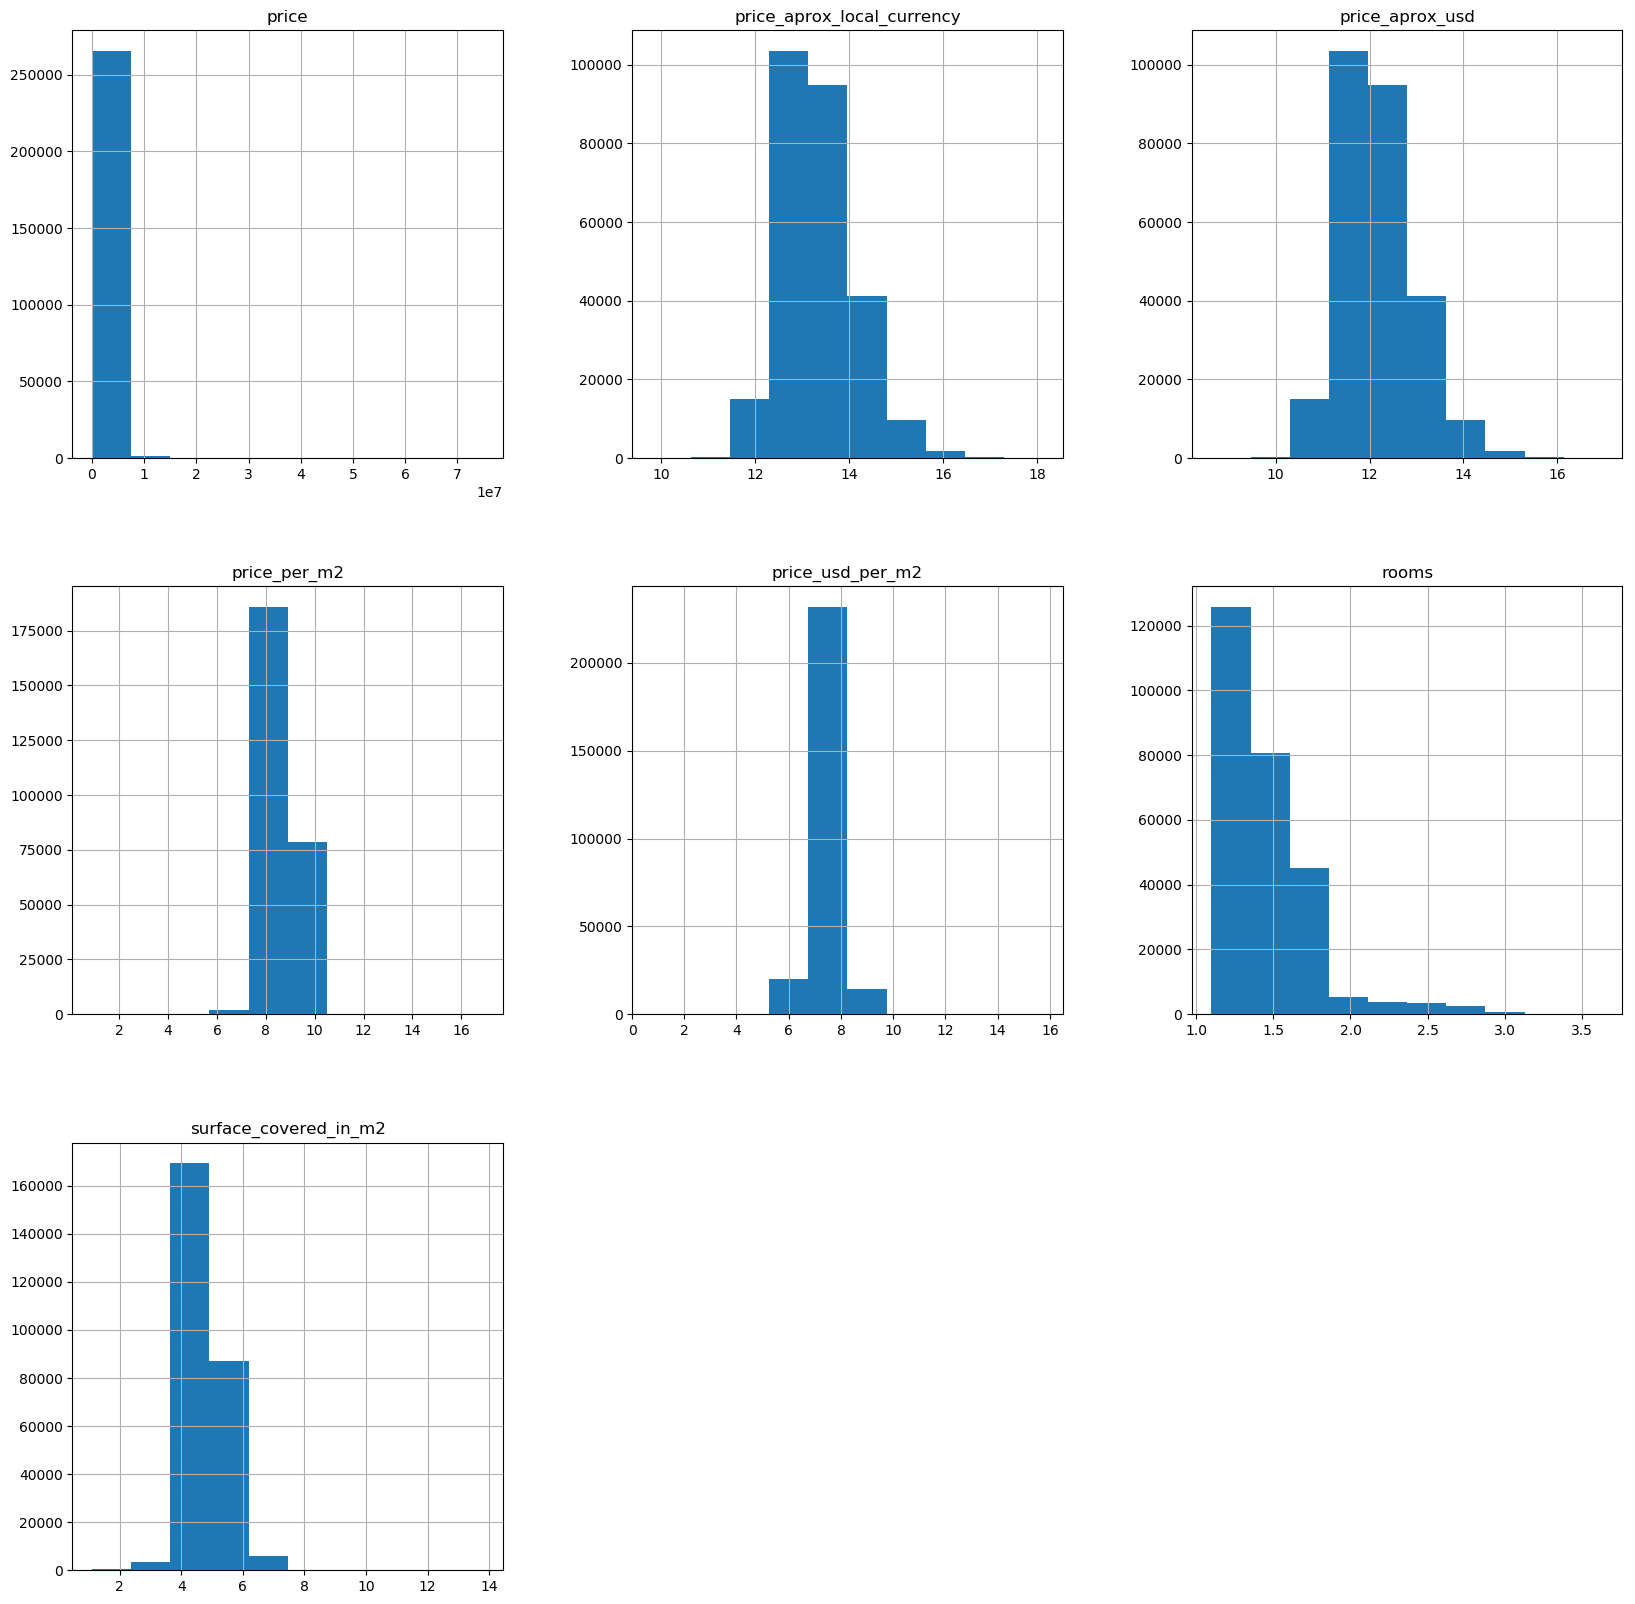

In [33]:
#análise do histograma
plt.style.use("default")
df_copy.hist(layout=(3,3), figsize= (20,20))
plt.show()

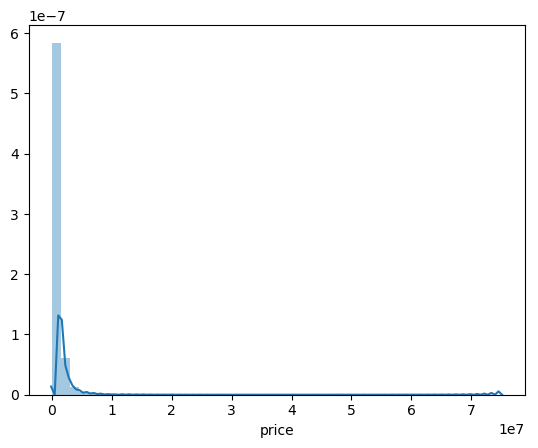

In [34]:
# Análise da distribuição da variável target
sns.distplot(df["price"]);

A tratativa dos valores do dataset com a função logarítma permitiu deixar os dados mais coerentes, sem a necessidade de remover os outros Estados.

### Análise de Correlação

In [35]:
# Correlação entre os dados quantitativos
df.corr()

,price,price_aprox_local_currency,price_aprox_usd,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms
price,1.000000,0.999987,0.999987,0.030213,0.085083,0.085171,0.287282
price_aprox_local_currency,0.999987,1.000000,1.000000,0.030192,0.085405,0.085489,0.287522
price_aprox_usd,0.999987,1.000000,1.000000,0.030192,0.085405,0.085489,0.287522
surface_covered_in_m2,0.030213,0.030192,0.030192,1.000000,-0.001453,-0.001458,0.022402
price_usd_per_m2,0.085083,0.085405,0.085405,-0.001453,1.000000,0.999984,0.016335
price_per_m2,0.085171,0.085489,0.085489,-0.001458,0.999984,1.000000,0.016252
rooms,0.287282,0.287522,0.287522,0.022402,0.016335,0.016252,1.000000


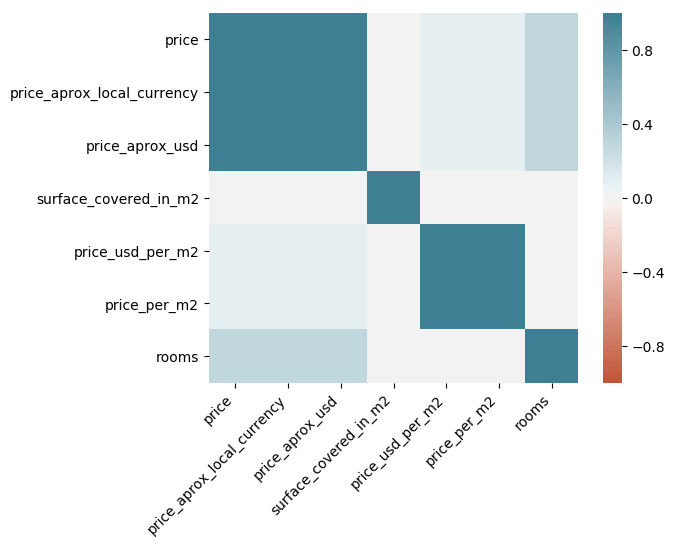

In [36]:
# Correlação entre as variáveis quantitativa de forma gráfica

# Grádico de correlação sem a tratativa para histograma
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

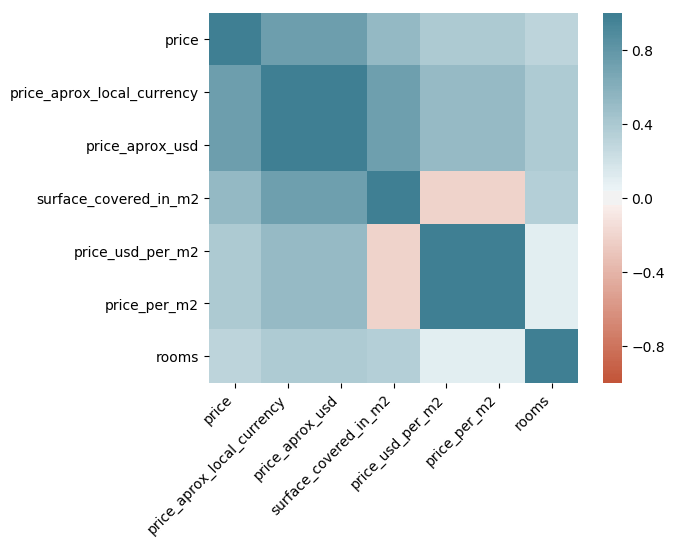

In [37]:
# Correlação entre as variáveis quantitativa de forma gráfica

# Grádico de correlação com a tratativa para histograma
corr = df_copy.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Com a alta taxa de correlação entre as variáveis `price`, `price_aprox_local_currency` e `price_approx_usd` será necessário remover algumas dessas variáveis. No caso, como a variável target é `price`, as outras duas serão removidas para construção do modelo.

### Criação de um dataset somente com o estado de São Paulo

In [38]:
# filtrando o dataset somente para o estado de São Paulo
df_sp = df[df['Estado'] == 'São Paulo']

In [39]:
# Dimensão do dataset
df_sp.shape

(215245, 14)

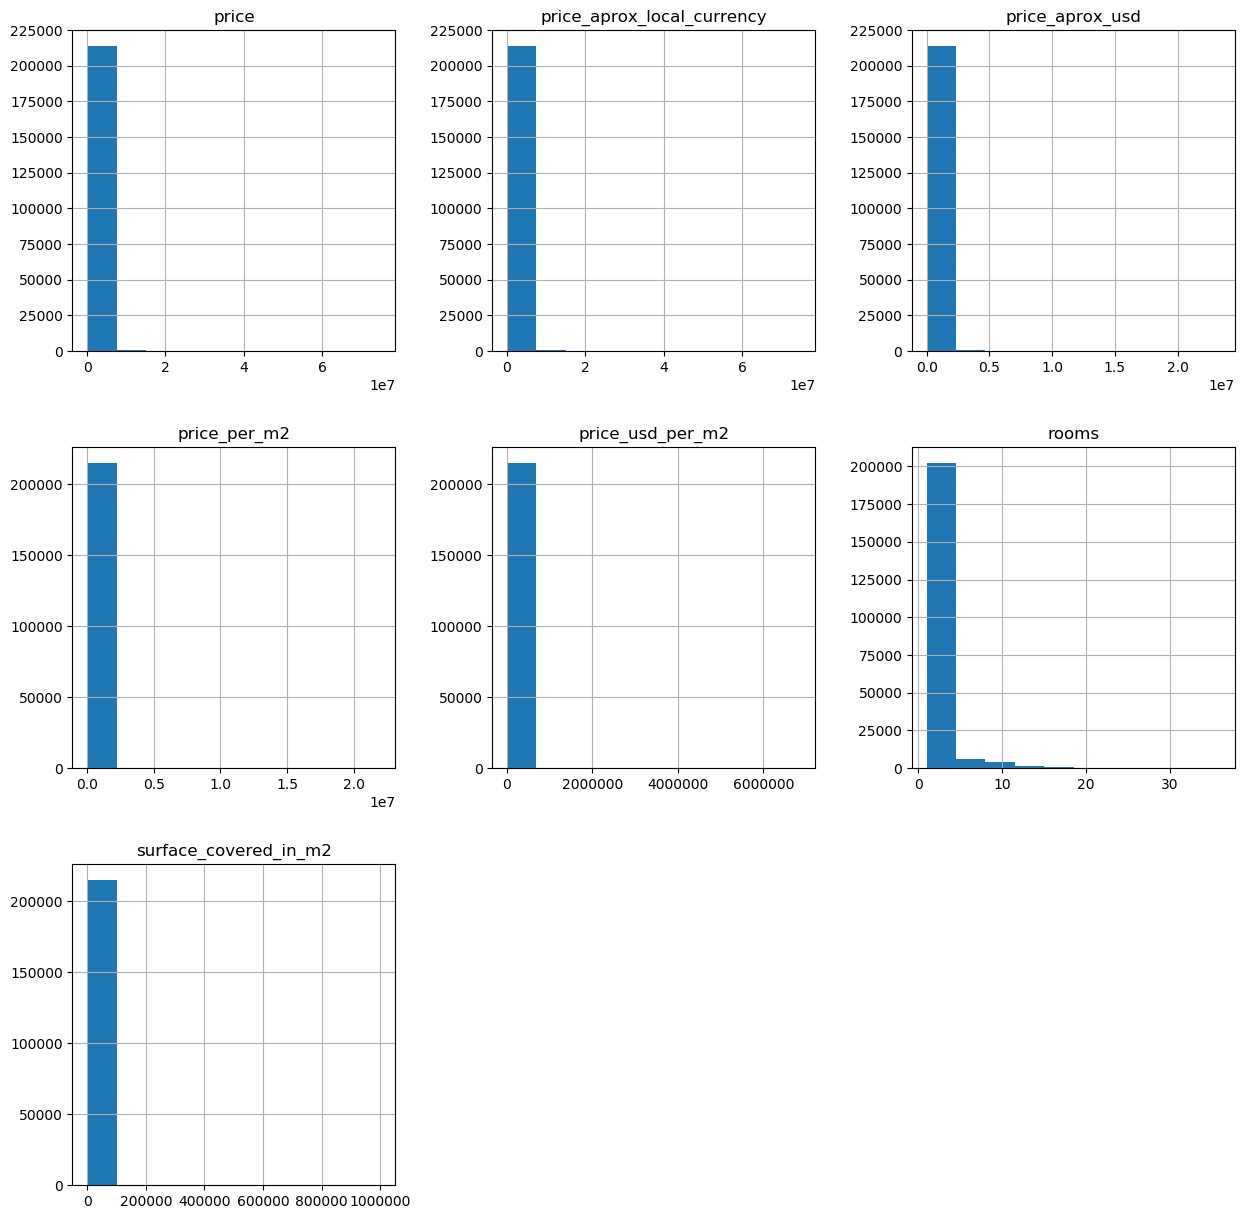

In [40]:
#análise do histograma somente para o Estado de São Paulo
plt.style.use("default")
df_sp.hist(layout=(3,3), figsize= (15,15))
plt.show()

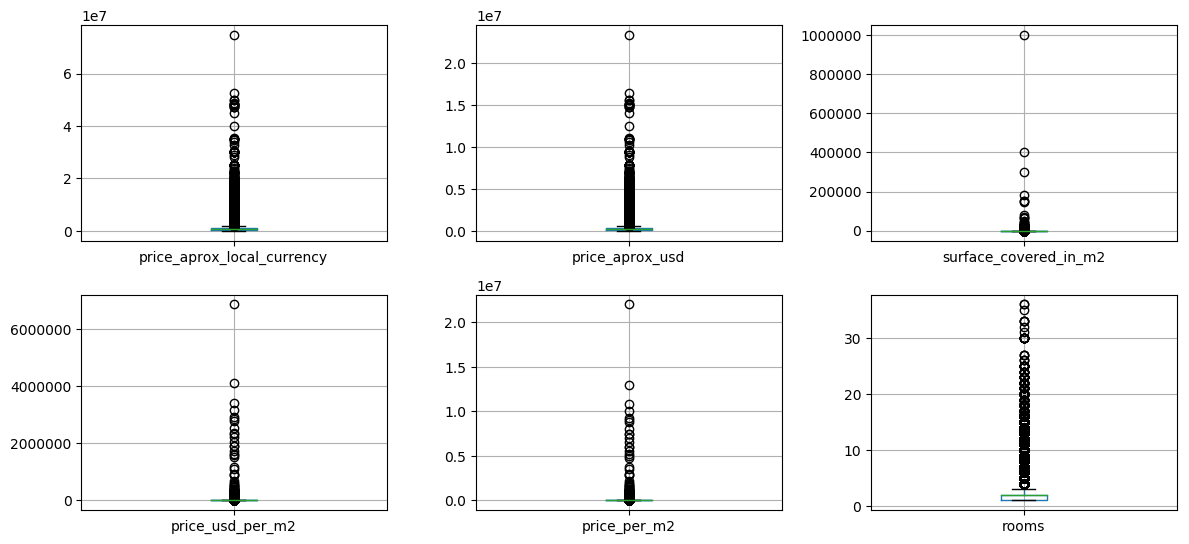

In [41]:
# Boxplot das variáveis somente para o Estado de São Paulo

# tamanho da área de plotagem

fig = plt.figure(figsize=(12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i+1);
    df_sp.boxplot(col);
    plt.tight_layout()

O resultado dos histograma e boxplots, somente do estado de São Paulo, entra em contradição com a análise feito acima, com os gráficos das médias anuais, uma vez que foi levantado a hipótese de que o desbalanceamento do histograma foi causado pelo alto intervalo das médias entre o Estado do Rio de Janeiro, São Paulo e Paraíba. Contudo, não havia sido considerado o número de registro do dataset, na análise anual dos preços. Como o maior número de registros pertence ao Estado de São Paulo, a remoção dos outros estados não causou mudança significativa no histograma e boxplot.

In [42]:
# criação de uma cópia para aplicação logarítmica no dataset
df_sp_treat = df_sp.copy()

In [43]:
# Transformação de log nas variáveis contínuas
df_sp_treat[continuous] = np.log1p(1 + df_sp_treat[continuous])

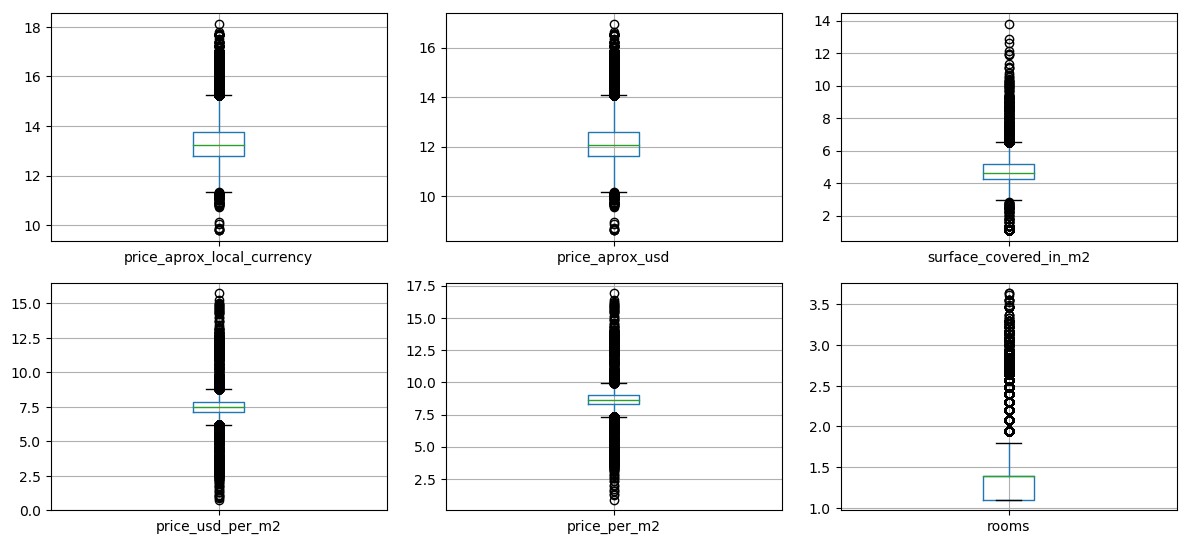

In [44]:
# Boxplot das variáveis somente para o Estado de São Paulo

# tamanho da área de plotagem

fig = plt.figure(figsize=(12,8))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuous):
    plt.subplot(3, 3, i+1);
    df_sp_treat.boxplot(col);
    plt.tight_layout()

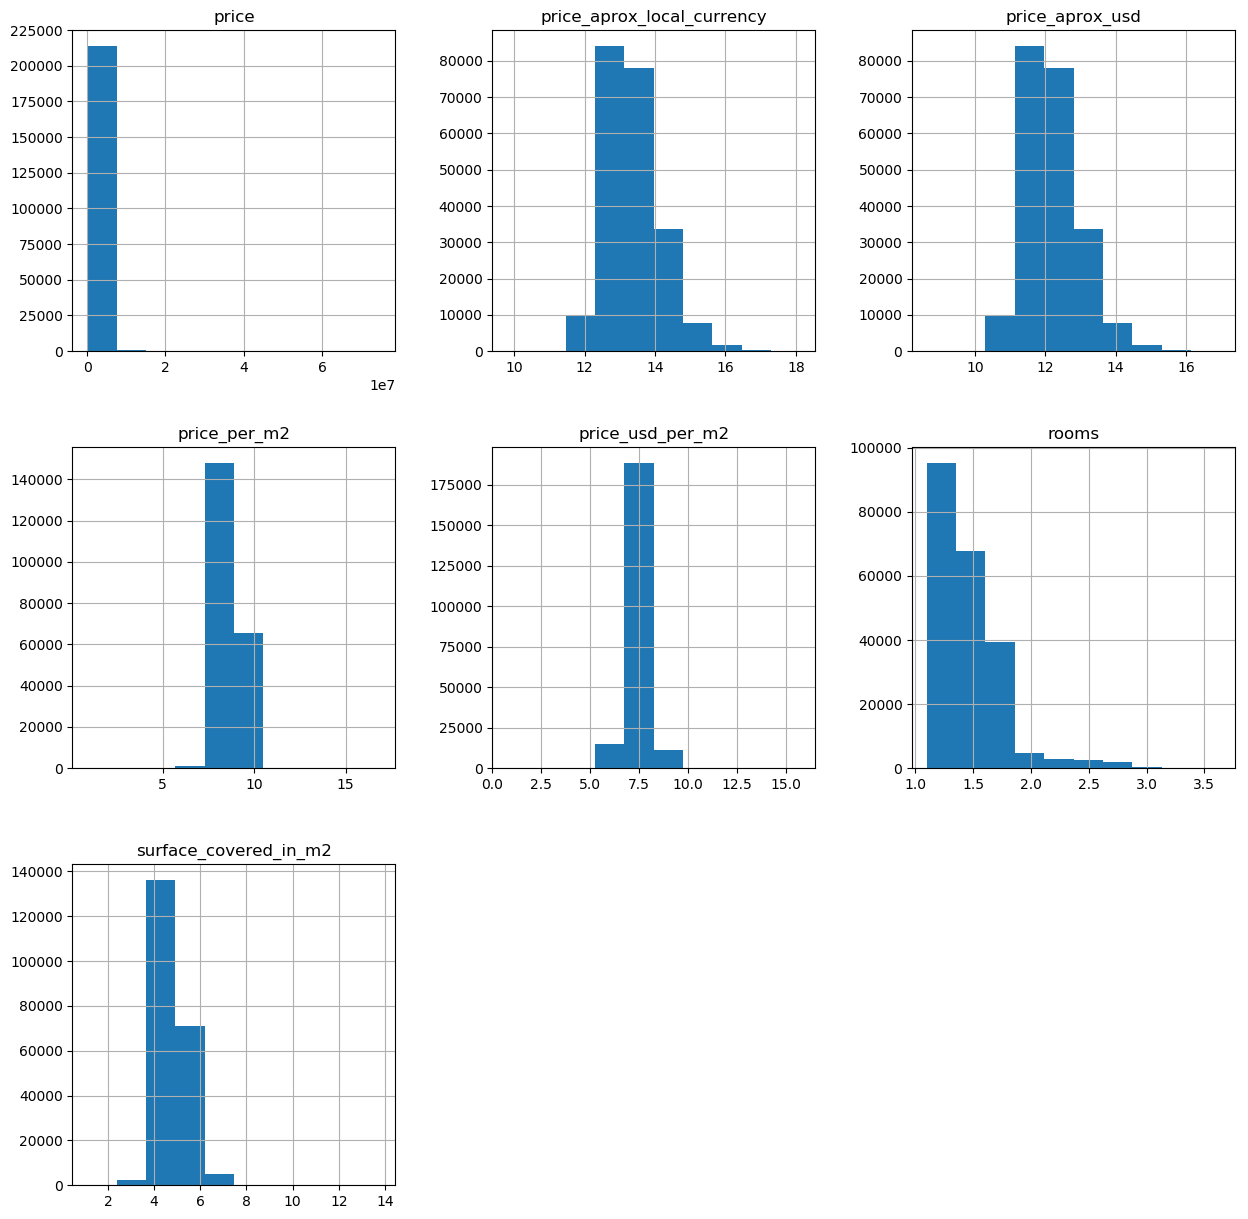

In [45]:
#análise do histograma somente para o Estado de São Paulo
plt.style.use("default")
df_sp_treat.hist(layout=(3,3), figsize= (15,15))
plt.show()

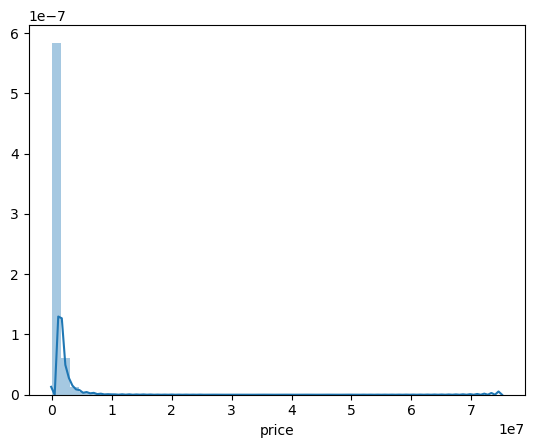

In [46]:
# Tratamento da variável target
sns.distplot(df_sp_treat["price"]);

In [47]:
# remoção das variáveis com alto grau de correlação
del df_sp_treat['price_aprox_local_currency']
del df_sp_treat['price_aprox_usd']
del df_sp_treat['price_usd_per_m2']

### Criação do Modelo

Métricas utilizadas nesse scripo: MSE e R^2

MSE - Mean Squared Error -> similar ao MAE, fornece a magnitude do erro do modelo;
- quanto maior, pior o modelo;
- ao extrair a raiz quadrada do MSE converte-se as unidades de volta ao original, o que pode ser útil para descrição e apresentação. Isso é chamado de RMSE (Root Mean Squared Error);

MAE - Mean Absolute Error
- é a soma da diferença absoluta entre previsões e valores reais;
- fornece uma ideia de quão erradas estão as previsões realizadas;
- valor igual a 0 indica que não há erro, sendo a previsão perfeita;

R^2
- essa métrica fornece uma indicação do nível de previsão das previsões em relação aos valores observados;
- também chamado de coeficiente de deterinação;
- valores entre 0 e 1, sendo 0 o valor ideal;


In [48]:
# Criação do modelo sem a tratativa
del df_sp['price_aprox_local_currency']
del df_sp['price_aprox_usd']
del df_sp['price_usd_per_m2']

In [49]:
# dados quantitativos
quantitative = ['surface_covered_in_m2', 'price_per_m2', 'rooms', 'price']

In [50]:
df_model = df_sp[quantitative]

In [51]:
# transformando os dados em array
array = df_model.values

In [52]:
# separando o array em componentes de input e outout
X = array[:,0:3]
Y = array[:,3]

In [53]:
# divisão dos dados de treino e de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

In [54]:
# criação do modelo
modelo = LinearRegression()

In [55]:
# treinando o modelo
modelo.fit(X_train, Y_train)

LinearRegression()

In [56]:
# previsões com o modelo criado
Y_pred = modelo.predict(X_test)

In [57]:
# resultado utilizando a métrica mse
from sklearn.metrics import mean_absolute_error

mse = mean_absolute_error(Y_test, Y_pred)
print("O MSE encontrado: ", mse)

O MSE encontrado:  558356.2697405245


In [58]:
# resultado utilizando a métrica R^2
from sklearn.metrics import r2_score

r2_Score = r2_score(Y_test, Y_pred)
print("O R2 Score encontrado: ", r2_Score)

O R2 Score encontrado:  0.08561432075574371


In [59]:
# criação do modelo com os dados tratados
df_model2 = df_sp_treat[quantitative]

# transformando os dados em array
array = df_model2.values

# separando o array em componentes de input e outout
X = array[:,0:3]
Y = array[:,3]

# divisão dos dados de treino e de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# criação do modelo
modelo2 = LinearRegression()

# treinando o modelo
modelo2.fit(X_train, Y_train)

# previsões com o modelo criado
Y_pred2 = modelo2.predict(X_test)

In [60]:
mse2 = mean_absolute_error(Y_test, Y_pred2)
print("O MSE encontrado: ", mse2)

O MSE encontrado:  387377.61324189475


In [61]:
r2_Score2 = r2_score(Y_test, Y_pred2)
print("O R2 Score encontrado: ", r2_Score2)

O R2 Score encontrado:  0.574732638399995


As métricas saíram com valores muito alto, o que representa algum tipo de erro no modelamento. Para isso, será utilizado mais dados, como o tipo de imóvel (apartment, house, store e PH)

In [62]:
df_sp_treat['property_type'] = df_sp_treat['property_type'].replace("apartment", 1)
df_sp_treat['property_type'] = df_sp_treat['property_type'].replace("house", 2)
df_sp_treat['property_type'] = df_sp_treat['property_type'].replace("PH", 3)
df_sp_treat['property_type'] = df_sp_treat['property_type'].replace("store", 4)

In [63]:
# acrescentando "property_type" às variáveis quantitativas
quantitative = ['surface_covered_in_m2', 'price_per_m2', 'rooms', 'property_type', 'price']

In [64]:
# criação do modelo com os dados tratados
df_model3 = df_sp_treat[quantitative]

# transformando os dados em array
array = df_model3.values

# separando o array em componentes de input e outout
X = array[:,0:4]
Y = array[:,4]

# divisão dos dados de treino e de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

# criação do modelo
modelo3 = LinearRegression()

# treinando o modelo
modelo3.fit(X_train, Y_train)

# previsões com o modelo criado
Y_pred3 = modelo3.predict(X_test)

In [65]:
mse3 = mean_absolute_error(Y_test, Y_pred3)
print("O MSE encontrado: ", mse3)

O MSE encontrado:  386608.14568766876


In [66]:
r2_Score3 = r2_score(Y_test, Y_pred3)
print("O R2 Score encontrado: ", r2_Score3)

O R2 Score encontrado:  0.5712250660089222


As métricas dos modelos de regressão apresentaram um valor muito distorcido, o que pode ser consequuência de pouca tratativa dos valores outliers. Para que as métricas comecem a ficar com valores mais coerentes, há necessidade de realizar maiores tratativas com os outliers.

In [67]:
# A tratativa dos Outliers será realizada no próximo script.
df_sp.to_csv('df_sp.csv', index=False, sep= ',', encoding='utf-8')